In [3]:

from folium import plugins

from IPython.display import display

In [4]:
plugins.MarkerCluster?


In [5]:
folium.__version__


'0.5.0'

In [6]:
import sys
sys.prefix

'/home/rick/anaconda2/envs/gis-test'

In [26]:
import geopandas as gpd
hexes = gpd.read_file('data/hexsim/hexes2.shp')

Hex_ID  Score                                           geometry
0  709226    1.0  POLYGON ((-1998711.966942929 2791326.766214422...
1  634479    1.0  POLYGON ((-1997666.743977781 2791930.225974713...
2  709227    1.0  POLYGON ((-1998687.938828788 2791326.766214422...
3  634480    1.0  POLYGON ((-1997642.715863639 2791930.225974713...
4  709228    1.0  POLYGON ((-1998663.910714647 2791326.766214422...

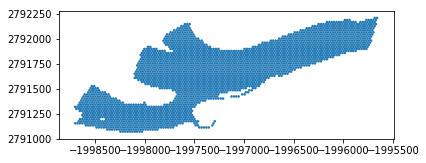

In [10]:
display(hexes.head())
% matplotlib inline
hexes.plot()

In [43]:
import folium
stamen_watercolor = folium.Map(location=[lat_Center,lon_Center], tiles="Stamen Terrain", zoom_start=15, attr='@Mapbox')

stamen_watercolor.add_child(folium.GeoJson('./hex_sim/hexes2.json', name='Hexes'))

stamen_watercolor

In [11]:
hexes.crs

{'datum': 'NAD83',
 'lat_0': 23,
 'lat_1': 29.5,
 'lat_2': 45.5,
 'lon_0': -96,
 'no_defs': True,
 'proj': 'aea',
 'units': 'm',
 'x_0': 0,
 'y_0': 0}

In [12]:
g = hexes.to_crs({'init':'epsg:4326'})

In [13]:
g.crs

{'init': 'epsg:4326'}

In [14]:
# g.to_file('data/hexsim/hexes2.json', driver='GeoJSON')

In [15]:
extent = g.unary_union.bounds
lat_Center = (extent[1] + extent[3]) / 2
lon_Center = (extent[0] + extent[2]) / 2
print(lat_Center,lon_Center)

45.64572729528804 -121.92969992482298


In [16]:
import pandas as pd
heat = pd.read_csv('data/hexsim/hex_temp.csv')
heat.head()

Hex_ID  CWR_ID  SIZE_RANK  T070116_00  T070116_01  T070116_02  T070116_03  \
0  417964       1          0    17.81471   17.736226   17.737968   17.716484   
1  417965       1          0    17.81471   17.736226   17.737968   17.716484   
2  420542       1          0    17.81471   17.736226   17.737968   17.716484   
3  420543       1          0    17.81471   17.736226   17.737968   17.716484   
4  420544       1          0    17.81471   17.736226   17.737968   17.716484   

   T070116_04  T070116_05  T070116_06     ...      T070116_14  T070116_15  \
0   17.701774   17.692097   17.677387     ...       17.806097   17.832968   
1   17.701774   17.692097   17.677387     ...       17.806097   17.832968   
2   17.701774   17.692097   17.677387     ...       17.806097   17.832968   
3   17.701774   17.692097   17.677387     ...       17.806097   17.832968   
4   17.701774   17.692097   17.677387     ...       17.806097   17.832968   

   T070116_16  T070116_17  T070116_18  T070116_19  T070116_20  T070116_21  \
0   17.859097   17.860903   17.877032   17.883452   17.906419   17.879935   
1   17.859097   17.860903   17.877032   17.883452   17.906419   17.879935   
2   17.859097   17.860903   17.877032   17.883452   17.906419   17.879935   
3   17.859097   17.860903   17.877032   17.883452   17.906419   17.879935   
4   17.859097   17.860903   17.877032   17.883452   17.906419   17.879935   

   T070116_22  T070116_23  
0   17.873097   17.869548  
1   17.873097   17.869548  
2   17.873097   17.869548  
3   17.873097   17.869548  
4   17.873097   17.869548  

[5 rows x 27 columns]

In [17]:
dep = pd.read_csv('data/hexsim/reach1_500_depth_m.csv')
len(dep)

162068

In [39]:
print(dep.columns)
print(hexes.columns)

Index(['Hex_ID', 'Depth_m'], dtype='object')
Index(['Hex_ID', 'Score', 'geometry', 'CWR_ID', 'SIZE_RANK', 'T070116_00',
       'T070116_01', 'T070116_02', 'T070116_03', 'T070116_04', 'T070116_05',
       'T070116_06', 'T070116_07', 'T070116_08', 'T070116_09', 'T070116_10',
       'T070116_11', 'T070116_12', 'T070116_13', 'T070116_14', 'T070116_15',
       'T070116_16', 'T070116_17', 'T070116_18', 'T070116_19', 'T070116_20',
       'T070116_21', 'T070116_22', 'T070116_23'],
      dtype='object')


In [40]:
hexes = hexes.merge(dep, on='Hex_ID')

In [47]:
hexes.Depth_m.quantile([.2,.4,.6,.8])

0.2   -24.449952
0.4   -18.556043
0.6   -15.042077
0.8   -10.314480
Name: Depth_m, dtype: float64

In [55]:
len(hexes[hexes.Depth_m > -24.449952][-18.556043 > hexes.Depth_m])
# len(hexes)

/home/rick/anaconda2/envs/gis-test/lib/python3.6/site-packages/geopandas/geodataframe.py:398: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


558

In [ ]:
hexes.loc[:,['Hex_ID','Depth_m']]

In [ ]:
# hexes = hexes.merge(heat, on='Hex_ID')
# hexes.plot(column='SIZE_RANK', cmap='OrRd')
hexes['SIZE_RANK'].value_counts().plot(kind='bar', title="Size Rank")

In [ ]:
hexes.loc[hexes.SIZE_RANK ==5,:]

In [19]:
stamen_watercolor = folium.Map(location=[lat_Center,lon_Center], tiles="Stamen Terrain", zoom_start=15, attr='@Mapbox')

stamen_watercolor.add_child(folium.GeoJson('./hex_sim/hexes2.json', name='Hexes'))

print(os.path.exists('float_image.png'))
plugins.FloatImage('https://debboutr.github.io/epa_clipped.png', bottom=80, left=8).add_to(stamen_watercolor)

stamen_watercolor.save("watermap.html")

stamen_watercolor

False


In [77]:
plugins.FloatImage?

In [15]:
import os
os.getcwd()

'/home/rick/projects/2018_GIS_workshop'

In [33]:
folium.GeoJson?

In [35]:
# DUPLICATE! get another version w/ popup holding the img and data

stamen_watercolor = folium.Map(location=[lat_Center,lon_Center], 
                               tiles=("https://api.mapbox.com/styles/v1/mapbox/satellite-v9/tiles/256/{z}/{x}/{y}?"
                                      "access_token=pk.eyJ1IjoiZGFyYW9iZWlybmUiLCJhIjoidlV2WXZKRSJ9."
                                      "EwVOY6b8UeyIz3N2UAu5pw"), 
                               zoom_start=14, attr='@Mapbox')

json = folium.GeoJson('./hex_sim/hexes2.json', 
                      name='Hexes',
                      style_function=lambda x: {     'fillColor' :'red', 
                                                  'fill_opacity' : 0.47, 
                                                         'color' : 'green',
                                                        'weight' : 1},
                      highlight_function= lambda x: {'fillColor' : 'blue',
                                                        'weight' : 3})

# folium.Popup('{}\n{}')).add_to(c)

stamen_watercolor.add_child(json)

h = ('<style>'
         '#title{'
             'position: fixed;'
             'bottom: 50px;'
             'left: 50px;'
             'width:33%;'
             'z-index:9999;'
             'background-color: rgba(255, 0, 0, 0.4);'
             'border-radius: 25px;'
             'border: 2px solid #73AD21;'
         '}'
     '</style>'     
     '<div id="title">'
        '<h1 style="color:yellow; text-align: center;">Hex Sim</h1>'
         '<img src="https://debboutr.github.io/epa_small.png" alt="no_bueno" >'
     '</div>')
stamen_watercolor.get_root().html.add_child(folium.Element(h))

stamen_watercolor.save("watermap.html")
stamen_watercolor

In [23]:
h


'<style>#title{position: fixed;bottom: 50px;left: 50px;width:33%;z-index:9999;background-color: rgba(255, 0, 0, 0.4);border-radius: 25px;border: 2px solid #73AD21;}</style><div id="title"><h1 style="color:yellow; text-align: center;">Hex Sim</h1><img src="https://debboutr.github.io/epa_clipped.png" alt="no_bueno" width=147 height=147></div>'

In [45]:
h.head()

Hex_ID  Score                                           geometry
0  709226    1.0  POLYGON ((-1998711.966942929 2791326.766214422...
1  634479    1.0  POLYGON ((-1997666.743977781 2791930.225974713...
2  709227    1.0  POLYGON ((-1998687.938828788 2791326.766214422...
3  634480    1.0  POLYGON ((-1997642.715863639 2791930.225974713...
4  709228    1.0  POLYGON ((-1998663.910714647 2791326.766214422...

In [29]:
df = pd.read_csv(
    os.path.join('data', 'highlight_flight_trajectories.csv')
)

In [30]:
df

Unnamed: 0                                    dep  \
0           0  Place_MontpellierMediterranee_Airport   
1           1               Place_Bristol___Lulsgate   
2           2         Place_Valencia_Manises_Airport   

                                   dest  \
0           Place_BastiaPoretta_Airport   
1  Place_TenerifeSur_ReinaSofia_Airport   
2   Place_Bucuresti_HenriCoanda_Airport   

                                             geojson  
0  {"type": "LineString", "coordinates": [[3.9613...  
1  {"type": "LineString", "coordinates": [[-2.719...  
2  {"type": "LineString", "coordinates": [[-0.481...

In [102]:
from shapely.geometry import mapping
import json


m = folium.Map(
    location=[lat_Center,lon_Center],
    zoom_start=13,
    control_scale=True,
    prefer_canvas=True
)


def style_function(feature):
    return {
        'fillColor': '#ffaf00',
        'color': 'blue',
        'weight': 1.5,
        'dashArray': '5, 5'
    }


def highlight_function(feature):
    return {
        'fillColor': '#ffaf00',
        'color': 'green',
        'weight': 3,
        'dashArray': '5, 5'
    }


for idx, row in hexes.iterrows():
    c = folium.GeoJson(
        json.dumps(mapping(row.geometry)),
        name=('Hex_ID: {}'.format(row.Hex_ID)),
        overlay=False,
        style_function=style_function,
#         highlight_function=highlight_function
    )
    folium.Popup('Hex_ID: {}'.format(row.Hex_ID)).add_to(c)
    c.add_to(m)

folium.LayerControl().add_to(m)
#m.save(os.path.join('results', 'Highlight_Function.html'))

m

In [84]:
for index, row in hexes.iterrows():
    break

In [95]:
from shapely.geometry import mapping
import json
# row.geometry.mapping()
# shapely.geometry.mapping(row.geometry)
json.dumps(mapping(row.geometry))

'{"type": "Polygon", "coordinates": [[[-1998711.9669429292, 2791326.766214422], [-1998699.9528858585, 2791333.702533506], [-1998687.938828788, 2791326.766214422], [-1998687.938828788, 2791312.893576254], [-1998699.9528858585, 2791305.95725717], [-1998711.9669429292, 2791312.893576254], [-1998711.9669429292, 2791326.766214422]]]}'

In [108]:
# row.to_json?
idx

12

In [61]:
#convert shapely geometry to geojson

ModuleNotFoundError: No module named 'geojson'

In [79]:
hexes = hexes.loc[:12,:]

In [109]:
folium.utilities?
